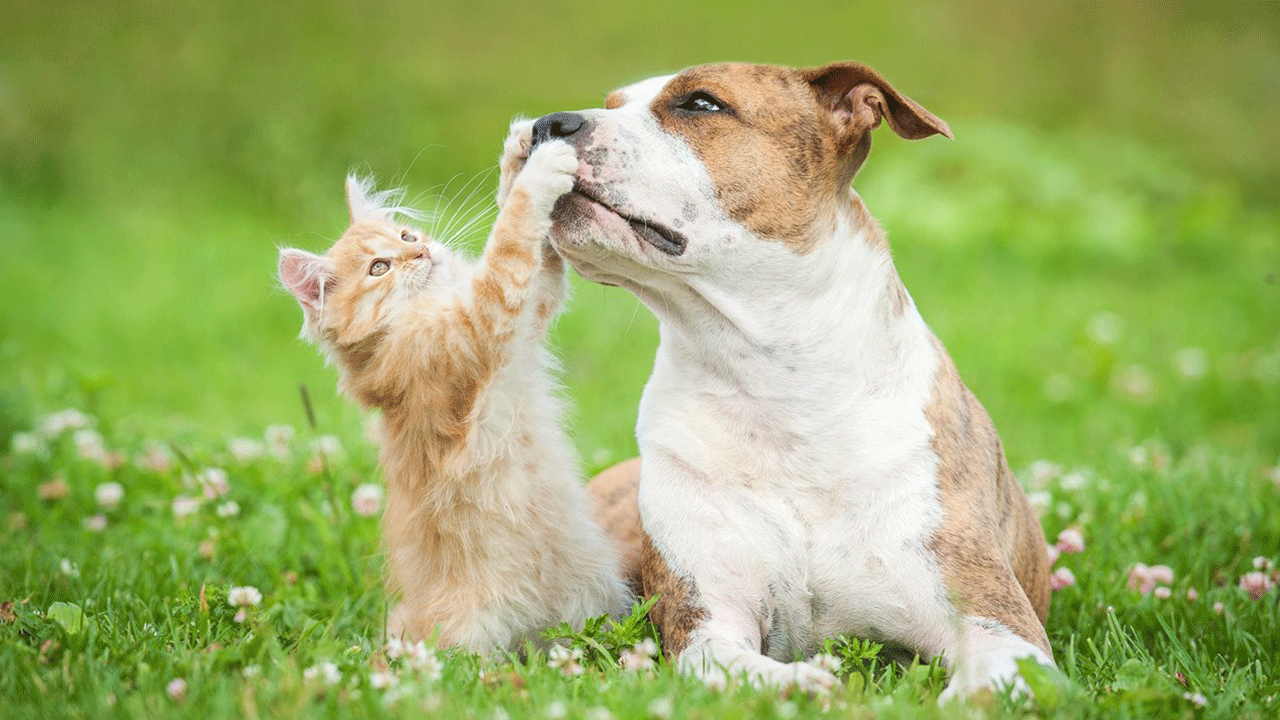

# Dogs Vs Cats

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, cv2, itertools # cv2 -- OpenCV
import matplotlib.pyplot as plt 
import zipfile as ZipFile
import random
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,BaggingClassifier,StackingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
filenames = os.listdir(r'C:\Users\נעמיה\data-science\sb\train')
categories = []
image=[]
s=100
for filename in filenames:
    
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        
for img in filenames:
    path=r'./train/'+ img
    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    try:
        new_img_array = cv2.resize(img_array, dsize=(s, s))
        new_img_array=new_img_array.reshape(s*s)
        image.append(new_img_array)
    except:
        break

df = pd.DataFrame({
    'filename': filenames,
    'image':image,
    'category': categories
})

dictionary = {
    0 :'Cat',
    1 : 'Dog'
}

# Getting the values from the dictionary
class_names = list(dictionary.values())

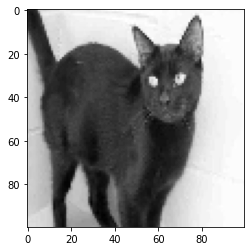

In [27]:
plt.imshow(random.choice(image).reshape(s,s),cmap='gray')

In [4]:
df.sample(10)

,filename,image,category
16601,dog.2439.jpg,"[91, 88, 90, 75, 67, 27, 25, 16, 19, 35, 23, 2...",1
9260,cat.7082.jpg,"[255, 255, 255, 255, 255, 254, 254, 254, 255, ...",0
22945,dog.8149.jpg,"[55, 53, 54, 49, 53, 54, 57, 51, 55, 50, 57, 6...",1
6504,cat.4601.jpg,"[62, 56, 47, 43, 45, 46, 61, 43, 51, 43, 37, 3...",0
12372,cat.9884.jpg,"[183, 184, 180, 184, 181, 184, 179, 181, 182, ...",0
7680,cat.5660.jpg,"[229, 229, 226, 233, 232, 232, 235, 222, 233, ...",0
5881,cat.4040.jpg,"[26, 20, 23, 21, 20, 23, 25, 18, 18, 18, 14, 1...",0
7145,cat.5179.jpg,"[175, 170, 172, 171, 172, 173, 169, 167, 166, ...",0
8396,cat.6304.jpg,"[148, 207, 186, 151, 197, 210, 169, 153, 217, ...",0
23652,dog.8786.jpg,"[92, 77, 33, 28, 26, 32, 54, 76, 81, 81, 81, 8...",1


In [5]:
image=np.array(image)
image_re = image.reshape(len(image),-1)
image_re

array([[168, 174, 177, ...,   2,   2,   2],
       [ 43,  44,  43, ...,  89,  19,  36],
       [ 39,  25,  43, ..., 169, 171, 153],
       ...,
       [ 42,  35,  47, ..., 127, 113, 167],
       [254, 251, 245, ..., 116, 114, 121],
       [240, 241, 243, ..., 254, 254, 254]], dtype=uint8)

([<matplotlib.axis.XTick at 0x1ee68185460>,
 [Text(0, 0, 'Cat'), Text(1, 0, 'Dog')])

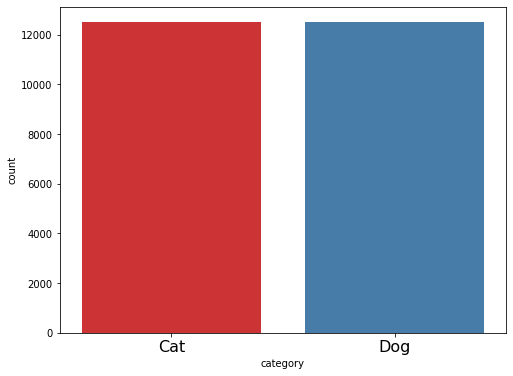

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="category",palette="Set1")
plt.xticks(ticks=[0,1],labels =class_names,fontsize=16)

In [7]:
from sklearn.model_selection import train_test_split
X=image_re
y=df['category']


temp_x_train, x_test, temp_y_train, y_test = train_test_split(X,y,test_size=0.1)
x_train, final_x_test, y_train, final_y_test = train_test_split(temp_x_train,temp_y_train,test_size=0.1)

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)


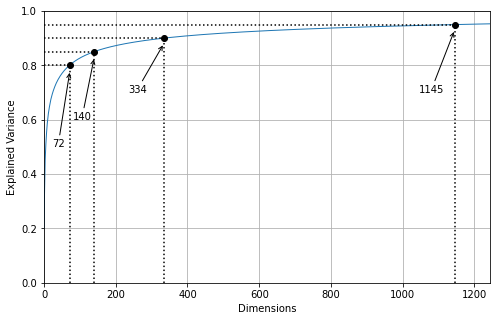

In [14]:
d = np.argmax(cumsum >= 0.95) + 1
d2 = np.argmax(cumsum >= 0.9) + 1
d3 = np.argmax(cumsum >= 0.85) + 1
d4 = np.argmax(cumsum >= 0.8) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, d+100, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(d, 0.93), xytext=(d-100, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d2, d2], [0, 0.9], "k:")
plt.plot([0, d2], [0.9, 0.9], "k:")
plt.plot(d2, 0.9, "ko")
plt.annotate(d2, xy=(d2, 0.88), xytext=(d2-100, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d3, d3], [0, 0.85], "k:")
plt.plot([0, d3], [0.85, 0.85], "k:")
plt.plot(d3, 0.85, "ko")
plt.annotate(d3, xy=(d3, 0.83), xytext=(d3-60, 0.6),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.plot([d4, d4], [0, 0.8], "k:")
plt.plot([0, d4], [0.8, 0.8], "k:")
plt.plot(d4, 0.8, "ko")
plt.annotate(d4, xy=(d4, 0.78), xytext=(d4-50, 0.5),
             arrowprops=dict(arrowstyle="->"), fontsize=10)
plt.grid(True)

plt.show()

In [15]:
pca = PCA(n_components=0.9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [16]:
print('dimensions x_train_pca:',x_train_pca.shape)
print('dimensions x_test_pca:',x_test_pca.shape)

dimensions x_train_pca: (20250, 334)
dimensions x_test_pca: (2500, 334)


In [20]:
pipe_dum = Pipeline([
    ('scaler', StandardScaler()),
    ('dummy', DummyClassifier(strategy="most_frequent"))
])
pipe_dum.fit(x_train_pca, y_train)

dumpred = pipe_dum.predict(x_test_pca)
accuracydum=accuracy_score(y_test, dumpred)

In [21]:
print(classification_report(y_test, dumpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.490     1.000     0.658      1225
         Dog      0.000     0.000     0.000      1275

    accuracy                          0.490      2500
   macro avg      0.245     0.500     0.329      2500
weighted avg      0.240     0.490     0.322      2500



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf.fit(x_train_pca, y_train)
pred=[]
rfpred = pipe_rf.predict(x_test_pca)
pred.append(rfpred)

In [23]:
print(classification_report(y_test, rfpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.587     0.620     0.603      1225
         Dog      0.614     0.580     0.597      1275

    accuracy                          0.600      2500
   macro avg      0.600     0.600     0.600      2500
weighted avg      0.600     0.600     0.600      2500



In [24]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000))
])
pipe_lr.fit(x_train_pca, y_train)
lrpred = pipe_lr.predict(x_test_pca)
pred.append(lrpred)

In [25]:
print(classification_report(y_test, lrpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.554     0.566     0.560      1225
         Dog      0.574     0.563     0.569      1275

    accuracy                          0.564      2500
   macro avg      0.564     0.564     0.564      2500
weighted avg      0.565     0.564     0.564      2500



In [26]:
pipe_et = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et.fit(x_train_pca, y_train)
etpred = pipe_et.predict(x_test_pca)
pred.append(etpred)

In [27]:
print(classification_report(y_test, etpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.578     0.648     0.611      1225
         Dog      0.618     0.546     0.580      1275

    accuracy                          0.596      2500
   macro avg      0.598     0.597     0.595      2500
weighted avg      0.598     0.596     0.595      2500



In [28]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipe_knn.fit(x_train_pca, y_train)
knnpred = pipe_knn.predict(x_test_pca)
pred.append(knnpred)

In [29]:
print(classification_report(y_test, knnpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.501     0.796     0.615      1225
         Dog      0.550     0.239     0.333      1275

    accuracy                          0.512      2500
   macro avg      0.525     0.518     0.474      2500
weighted avg      0.526     0.512     0.471      2500



In [30]:
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss'))
])
pipe_xgb.fit(x_train_pca, y_train)
xgbpred = pipe_xgb.predict(x_test_pca)
pred.append(xgbpred)

In [31]:
print(classification_report(y_test, xgbpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.638     0.650     0.644      1225
         Dog      0.657     0.645     0.651      1275

    accuracy                          0.648      2500
   macro avg      0.648     0.648     0.648      2500
weighted avg      0.648     0.648     0.648      2500



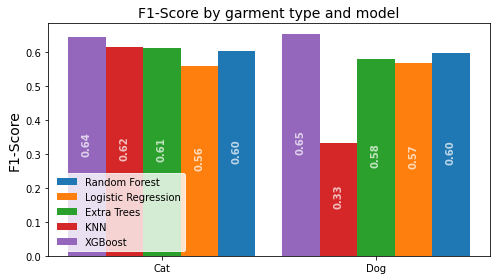

In [32]:
rows, cols = (5, 2)
arr = [[0 for i in range(cols)] for j in range(rows)]
j=0
for i in pred:
    fscore = f1_score(y_test, i ,average=None)
    arr[j]=fscore
    j+=1


fig, ax = plt.subplots(figsize = (7,4))
width = 0.35;width2=width/2
rect=[];i=0
x=np.arange(len(class_names))
for i in range(5):
    rect.append(ax.bar(x+width,arr[i],width2, label='class_names'))
    width-=width2

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score',fontsize=14)
ax.set_title('F1-Score by garment type and model',fontsize=14)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xticklabels(class_names)
legend=ax.legend(labels=['Random Forest','Logistic Regression','Extra Trees','KNN','XGBoost'],frameon = 2,loc='lower left',
         fontsize =10)
frame = legend.get_frame()
frame.set_color('white')
def axeplot(rect):
    ax.bar_label(rect, padding=3,fmt='%1.2f',label_type ='center',color='white',
                 fontweight='bold',fontsize=10,rotation=90,alpha=0.7)
for i in range(5):
    axeplot(rect[i])


fig.tight_layout()

## Tuning

In [8]:
pca2 = PCA(n_components=0.85)
x_train_pca2=pca2.fit_transform(x_train)
x_test_pca2=pca2.transform(x_test)
fin_x_test_pca2=pca2.transform(final_x_test)

In [9]:
print('dimensions x_train_pca2:',x_train_pca2.shape)
print('dimensions x_test_pca2:',x_test_pca2.shape)
print('dimensions fin_x_test_pca2:',fin_x_test_pca2.shape)


dimensions x_train_pca2: (20250, 140)
dimensions x_test_pca2: (2500, 140)
dimensions fin_x_test_pca2: (2250, 140)


In [35]:
pipe_xgb2 = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb',XGBClassifier(n_estimators=500,use_label_encoder=False,eval_metric='mlogloss'))
])
pipe_xgb2.fit(x_train_pca2, y_train)
xgbpred2 = pipe_xgb2.predict(x_test_pca2)


In [36]:
print(pipe_xgb.score(x_test_pca,y_test)," accuracy on XGB for 334 dimensions.")
print(pipe_xgb2.score(x_test_pca2,y_test)," accuracy on XGB for 140 dimensions.")

0.6476  accuracy on XGB for 334 dimensions.
0.658  accuracy on XGB for 140 dimensions.


In [37]:
pipe_rf2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
pipe_rf2.fit(x_train_pca2, y_train)
rfpred = pipe_rf2.predict(x_test_pca2)

In [39]:
print(pipe_rf.score(x_test_pca,y_test)," accuracy on RandomForest for 334 dimensions.")
print(pipe_rf2.score(x_test_pca2,y_test)," accuracy on RandomForest for 140 dimensions.")

0.5996  accuracy on RandomForest for 334 dimensions.
0.608  accuracy on RandomForest for 140 dimensions.


In [40]:
pipe_et2 = Pipeline([
    ('scaler', StandardScaler()),
    ('et', ExtraTreesClassifier())
])
pipe_et2.fit(x_train_pca2, y_train)
etpred2 = pipe_et2.predict(x_test_pca2)

In [41]:
print(pipe_et.score(x_test_pca,y_test)," accuracy on ExtraTrees for 334 dimensions.")
print(pipe_et2.score(x_test_pca2,y_test)," accuracy on ExtraTrees for 140 dimensions.")

0.596  accuracy on ExtraTrees for 334 dimensions.
0.6052  accuracy on ExtraTrees for 140 dimensions.


In [42]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = pipe_rf2, param_distributions = random_grid, cv = 5, n_jobs = -1)
rf_random.fit(x_train_pca2, y_train)
rf_random.best_params_


{'rf__n_estimators': 1000,
 'rf__min_samples_split': 10,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'auto',
 'rf__max_depth': 110,
 'rf__bootstrap': False}

In [26]:
rf_random.best_score_

0.6487901234567901

In [29]:
random_grid = {'et__n_estimators': n_estimators,
               'et__max_features': max_features,
               'et__max_depth': max_depth,
               'et__min_samples_split': min_samples_split,
               'et__min_samples_leaf': min_samples_leaf,
               'et__bootstrap': bootstrap}
et_random = RandomizedSearchCV(estimator = pipe_et2, param_distributions = random_grid, cv = 5, n_jobs = -1)
et_random.fit(x_train_pca2, y_train)

et_random.best_params_

{'et__n_estimators': 1400,
 'et__min_samples_split': 2,
 'et__min_samples_leaf': 4,
 'et__max_features': 'sqrt',
 'et__max_depth': 100,
 'et__bootstrap': False}

In [30]:
et_random.best_score_

0.6589135802469135

In [31]:
maxd = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
n_est= [200, 400, 600, 800, 1000, 1200, 1400,1600, 1800,2000]
lr= [0.1, 0.01,0.2,0.3, 0.05]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colsample_bylevel=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_child_weight=[0.5, 1.0, 3.0, 5.0, 7.0, 10.0]
gamma=[0, 0.25, 0.5, 1.0]
reg_lambda= [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]
parameters = dict(xgb__n_estimators=n_est,xgb__learning_rate=lr,xgb__colsample_bytree=colsample_bytree,
                  xgb__subsample=subsample,
                  xgb__colsample_bylevel=colsample_bylevel,
                  xgb__min_child_weight=min_child_weight,
                  xgb__reg_lambda=reg_lambda,
                  xgb__gamma=gamma,
                  xgb__max_depth=maxd)

In [33]:
xg_grid = RandomizedSearchCV(estimator = pipe_xgb2, param_distributions = parameters, cv = 5, n_jobs = -1)
xg_grid.fit(x_train_pca2, y_train)

xg_grid.best_params_

{'xgb__subsample': 0.8,
 'xgb__reg_lambda': 10.0,
 'xgb__n_estimators': 1600,
 'xgb__min_child_weight': 0.5,
 'xgb__max_depth': 50,
 'xgb__learning_rate': 0.01,
 'xgb__gamma': 0.5,
 'xgb__colsample_bytree': 1.0,
 'xgb__colsample_bylevel': 1.0}

In [34]:
xg_grid.best_score_

0.6647407407407407

## Voting

In [10]:
par_xgb={'subsample': 0.8,'reg_lambda': 10.0,'n_estimators': 1600,'min_child_weight': 0.5,'max_depth': 50,
 'learning_rate': 0.01,'gamma': 0.5,'colsample_bytree': 1.0,'colsample_bylevel': 1.0}
par_et={'n_estimators': 1400,'min_samples_split': 2,'min_samples_leaf': 4,'max_features': 'sqrt','max_depth': 100,
'bootstrap': False}
par_rf={'n_estimators': 1000,'min_samples_split': 10,'min_samples_leaf': 2,'max_features': 'auto','max_depth': 110,'bootstrap': False}
pipe_vote = Pipeline([('scaler', StandardScaler()),
        ('voting_clf', VotingClassifier(estimators=[
        ('xgb',XGBClassifier(**par_xgb,use_label_encoder=False,eval_metric='mlogloss')),
        ('rf', RandomForestClassifier(**par_rf)),
        ('erf', ExtraTreesClassifier(**par_et))], voting='soft' ,n_jobs=-1))])
pipe_vote.fit(x_train_pca2, y_train)
votepred = pipe_vote.predict(x_test_pca2)

In [20]:
print(classification_report(y_test, votepred,digits=4,target_names=class_names))

              precision    recall  f1-score   support

         Cat     0.6984    0.6289    0.6618      1296
         Dog     0.6392    0.7076    0.6717      1204

    accuracy                         0.6668      2500
   macro avg     0.6688    0.6682    0.6667      2500
weighted avg     0.6699    0.6668    0.6665      2500



## Bagging

In [12]:
pipe_bag = Pipeline([('scaler', StandardScaler()),
        ('bag', BaggingClassifier(base_estimator=ExtraTreesClassifier(**par_et),n_estimators=10, random_state=0))])
pipe_bag.fit(x_train_pca2, y_train)
bagpred = pipe_bag.predict(x_test_pca2)

In [19]:
print(classification_report(y_test, bagpred,digits=4,target_names=class_names))

              precision    recall  f1-score   support

         Cat     0.6850    0.6057    0.6429      1296
         Dog     0.6226    0.7002    0.6591      1204

    accuracy                         0.6512      2500
   macro avg     0.6538    0.6529    0.6510      2500
weighted avg     0.6549    0.6512    0.6507      2500



## AdaBoost

In [33]:
pipe_adb = Pipeline([
    ('scaler', StandardScaler()),
    ('adb',AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators = 1000, random_state = 0, learning_rate = 1))
])
pipe_adb.fit(x_train_pca2, y_train)
adbpred = pipe_adb.predict(x_test_pca2)

In [34]:
print(classification_report(y_test, adbpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.633     0.609     0.621      1296
         Dog      0.595     0.620     0.607      1204

    accuracy                          0.614      2500
   macro avg      0.614     0.614     0.614      2500
weighted avg      0.615     0.614     0.614      2500



## Stacking 

In [21]:

pipe_st = Pipeline([('scaler', StandardScaler()),
        ('st',StackingClassifier(estimators=
        [('xgb',XGBClassifier(**par_xgb,use_label_encoder=False,eval_metric='mlogloss')),
        ('rf', RandomForestClassifier(**par_rf)),
        ('erf', ExtraTreesClassifier(**par_et))],final_estimator=LogisticRegression()))])
pipe_st.fit(x_train_pca2, y_train)
stpred = pipe_st.predict(x_test_pca2)

In [22]:
print(classification_report(y_test, stpred,digits=4,target_names=class_names))

              precision    recall  f1-score   support

         Cat     0.6916    0.6489    0.6696      1296
         Dog     0.6456    0.6885    0.6664      1204

    accuracy                         0.6680      2500
   macro avg     0.6686    0.6687    0.6680      2500
weighted avg     0.6695    0.6680    0.6681      2500



## Final model

In [23]:
finalpred = pipe_st.predict(fin_x_test_pca2)

In [24]:
print(classification_report(final_y_test, finalpred,digits=3,target_names=class_names))

              precision    recall  f1-score   support

         Cat      0.679     0.657     0.668      1150
         Dog      0.653     0.675     0.664      1100

    accuracy                          0.666      2250
   macro avg      0.666     0.666     0.666      2250
weighted avg      0.667     0.666     0.666      2250

